In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer

## Read Data From File

In [9]:
# https://www.youtube.com/watch?v=iNlZ3IU5Ffw
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

col = ["Id", "Contributions", "JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
tcols = [x + '-T' for x in col]

In [10]:
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,1971706,0,0,0,0,2566242,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,4609687,0,0,0,0,0,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,1,358,3378185,0,0,0,0,2687760,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,11661,0,0,0,0,0,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,1,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8688


In [11]:
data.describe()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,274.000000,274.000000,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,...,274.000000,2.740000e+02,2.740000e+02,274.000000,2.740000e+02,2.740000e+02,274.000000,274.000000,274.0,2.740000e+02
mean,1.489051,573.332117,6.407678e+05,2.650285e+05,1.246125e+05,2.056523e+04,1.803513e+05,1.862770e+05,4.220884e+05,2.587109e+05,...,354.985401,9.331347e+03,1.478749e+04,169.503650,8.000284e+04,6.973368e+05,238.339416,84.569343,0.0,1.472903e+06
std,0.500795,1041.950406,3.303678e+06,1.391126e+06,7.029816e+05,1.308272e+05,1.910643e+06,1.148110e+06,3.722626e+06,1.357603e+06,...,4599.509004,9.150265e+04,1.717337e+05,1983.268118,5.386177e+05,8.735489e+06,3517.659306,1399.871715,0.0,1.191347e+07
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00
25%,1.000000,16.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,2.735000e+02
50%,1.000000,156.000000,5.997000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.296000e+03,0.000000,0.000000,0.0,1.164650e+04
75%,2.000000,736.000000,7.474600e+04,1.648400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.242250e+03,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,6.379250e+03,2.453025e+04,0.000000,0.000000,0.0,1.155182e+05
max,2.000000,11227.000000,3.934939e+07,1.628530e+07,6.652916e+06,1.554795e+06,2.940685e+07,1.393312e+07,4.316182e+07,1.553637e+07,...,71867.000000,1.418970e+06,2.773642e+06,24478.000000,5.821136e+06,1.438609e+08,57765.000000,23172.000000,0.0,1.724546e+08


In [12]:
data[col].mean()

Id               1.489051e+00
Contributions    5.733321e+02
JavaScript       6.407678e+05
Python           2.650285e+05
Java             1.246125e+05
C#               2.056523e+04
PHP              1.803513e+05
TypeScript       1.862770e+05
Ruby             4.220884e+05
C++              2.587109e+05
C                7.843896e+05
Swift            3.614061e+04
Go               4.969169e+05
Shell            3.303500e+04
Kotlin           2.788168e+05
Rust             4.183254e+05
PowerShell       8.257478e+03
Objective-C      2.442212e+04
R                4.147745e+03
MATLAB           1.001825e+01
Dart             3.549854e+02
Vue              9.331347e+03
Assembly         1.478749e+04
Sass             1.695036e+02
CSS              8.000284e+04
HTML             6.973368e+05
Pascal           2.383394e+02
Racket           8.456934e+01
Zig              0.000000e+00
Other            1.472903e+06
dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, mojombo to ziglee
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CreatedAt      274 non-null    object
 1   AvatarUrl      274 non-null    object
 2   Id             274 non-null    int64 
 3   Contributions  274 non-null    int64 
 4   JavaScript     274 non-null    int64 
 5   Python         274 non-null    int64 
 6   Java           274 non-null    int64 
 7   C#             274 non-null    int64 
 8   PHP            274 non-null    int64 
 9   TypeScript     274 non-null    int64 
 10  Ruby           274 non-null    int64 
 11  C++            274 non-null    int64 
 12  C              274 non-null    int64 
 13  Swift          274 non-null    int64 
 14  Go             274 non-null    int64 
 15  Shell          274 non-null    int64 
 16  Kotlin         274 non-null    int64 
 17  Rust           274 non-null    int64 
 18  PowerShell     274 non-nul

## Transform Data

#### 1. Make the bytes into percentages

In [14]:
def turn_to_percent(X, columns):
    X[columns] = X[columns].div(X[columns].sum(axis=1), axis=0)
    return X

# Create a FunctionTransformer using the defined function and pass the subset_columns argument
transformer = FunctionTransformer(turn_to_percent, validate=False, kw_args={'columns': col[2:]})

# Apply the transformation to your dataset
data = transformer.transform(data)
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,0.0,0.0,0.0,0.0,0.001352,0.003039,0.0,0.0,0.0,0.041842
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000998,0.003733,0.0,0.0,0.0,0.139780
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,1,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,0.0,0.0,0.0,0.0,0.003311,0.067557,0.0,0.0,0.0,0.000468
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.018068,0.0,0.0,0.0,0.003162
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,1,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045699


#### 2. Standardize the data using a StandardScaler

In [15]:
scaler = StandardScaler()

data[tcols] = scaler.fit_transform(data[col])
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,-0.061147,-0.154073,-0.082371,-0.081519,-0.218480,-0.336965,-0.060983,-0.060523,0.0,-0.408986
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,-0.061147,-0.154073,-0.082371,-0.081519,-0.221596,-0.332465,-0.060983,-0.060523,0.0,-0.070640
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,1,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,-0.061147,-0.154073,-0.082371,-0.081519,-0.201219,0.081425,-0.060983,-0.060523,0.0,-0.551922
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,-0.061147,-0.154073,-0.082371,-0.081519,-0.230385,-0.239502,-0.060983,-0.060523,0.0,-0.542616
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,1,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,-0.061147,-0.154073,-0.082371,-0.081519,-0.230385,-0.356671,-0.060983,-0.060523,0.0,-0.395663


#### 3. Determine Number of Clusters

In [16]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

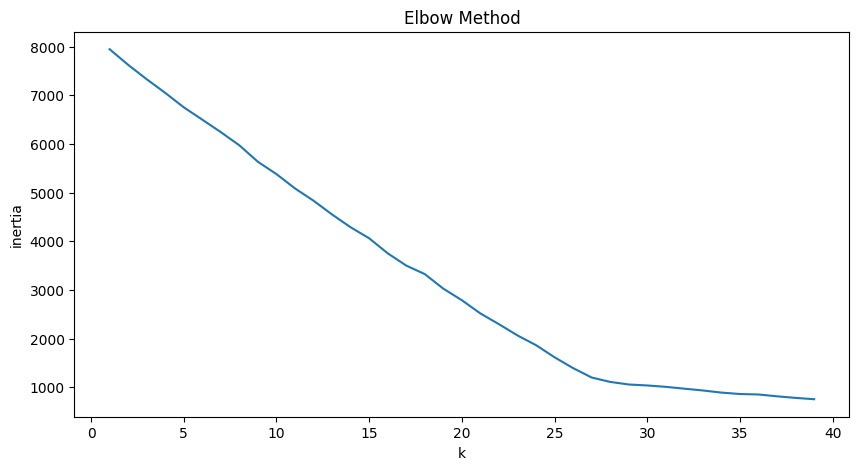

In [17]:
optimize_kmeans(data[tcols], 40)

#### 4 Apply K-Means Clustering

In [18]:
num_clusters = 25
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,-0.154073,-0.082371,-0.081519,-0.218480,-0.336965,-0.060983,-0.060523,0.0,-0.408986,12
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,-0.154073,-0.082371,-0.081519,-0.221596,-0.332465,-0.060983,-0.060523,0.0,-0.070640,1
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,1,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,-0.154073,-0.082371,-0.081519,-0.201219,0.081425,-0.060983,-0.060523,0.0,-0.551922,12
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,-0.154073,-0.082371,-0.081519,-0.230385,-0.239502,-0.060983,-0.060523,0.0,-0.542616,8
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,1,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,-0.154073,-0.082371,-0.081519,-0.230385,-0.356671,-0.060983,-0.060523,0.0,-0.395663,17


## Write K-Means Model to File

In [19]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## Write Means to File

In [21]:
mean = data[col].mean()
std = data[col].std()
with open("../data/meanAndStd.csv", "w") as f:
    f.write(",".join([x for x in col]) + "\n")
    f.write(",".join([str(mean[x]) for x in col]) + "\n")
    f.write(",".join([str(std[x]) if std[x] != 0 else "1.0" for x in col]) + "\n")


## Write Clusterized Data to File

In [23]:
clusterized_col = ["CreatedAt", "AvatarUrl"] + col + ['cluster']
with open("../data/clustered_data.csv", 'w') as f:
    f.write("Username," + ",".join([x for x in clusterized_col]) + "\n")
    for index, row in data.iterrows():
        f.write(index + "," + ",".join([str(row[x]) for x in clusterized_col]) + "\n")


## Debugging Code

In [24]:
train = data.sample(n=1)
train.drop(columns=['cluster'], inplace=True)

v = kmeans.predict(train[tcols])
v


array([2])